# AP04 - Análise de Dados usando Python e Jupyter

- Vinicius Vieira Viana = Setembro 2019

# Preparando o ambiente
### Baixando as bibliotecas

In [97]:
pip install seaborn matplotlib numpy pandas requests

### Após instalar as bibliotecas precisamos reiniciar o Kernel

### Importamos as bibliotecas
### E definimos um caminho para salvar uma cópia das tabelas

In [98]:
import matplotlib.pyplot as mpl
import numpy as np
import pandas as pd
import seaborn as sb
import requests

#caminho do arquivo
caminho_arquivo = "./dadosAcidentes.csv"
caminho_arquivo_filtrado = "./dadosAcidentesFiltrados.csv"

### Salvando endereço dos dados

In [99]:
url = 'https://armazenamento-dadosabertos.s3.sa-east-1.amazonaws.com/Plano+2016_2018_Grupos+de+dados/INSS+-+Comunica%C3%A7%C3%A3o+de+Acidente+de+Trabalho+-+CAT/cat-comp07-08-09-2019.csv'

### Fazendo requisição dos dados e salvando em um arquivo local

In [100]:
try:
    # Faz a requisição para a URL
    reponse = requests.get(url)
    reponse.raise_for_status()
    # Lê o arquivo CSV como um DataFrame do pandas
    df_acidentes = pd.read_csv(url, encoding='latin1', delimiter=';')
    df_acidentes.to_csv(caminho_arquivo, index=False)
    # Imprime as primeiras linhas do DataFrame
    print("Arquivo importado com sucesso e cópia salva.")
except FileNotFoundError:
    print(f"O arquivo '{caminho_arquivo}' não foi encontrado.")
except requests.exceptions.HTTPError as err:
    print("Erro HTTP: ", err)
except requests.exceptions.ConnectionError as err:
    print("Erro de conexão: ", err)
except Exception as e:
    print(f"Ocorreu um erro: {e}")

Arquivo importado com sucesso e cópia salva.


### Imprime a tabela inteira

In [101]:
#print(df_acidentes)

### Filtrando os dados

In [102]:
df_acidentes_filtrado = df_acidentes[df_acidentes['Data Acidente'] == '2019/09']
df_acidentes_filtrado.to_csv(caminho_arquivo_filtrado, index=False)


### Printando dados filtrados

In [103]:
#print(df_acidentes_filtrado)

## Utilizando MatPlotLib

### Números de acidentes por sexo
- Masculino.
- Feminino.

Foi salvo uma cópia do arquivo como imagem


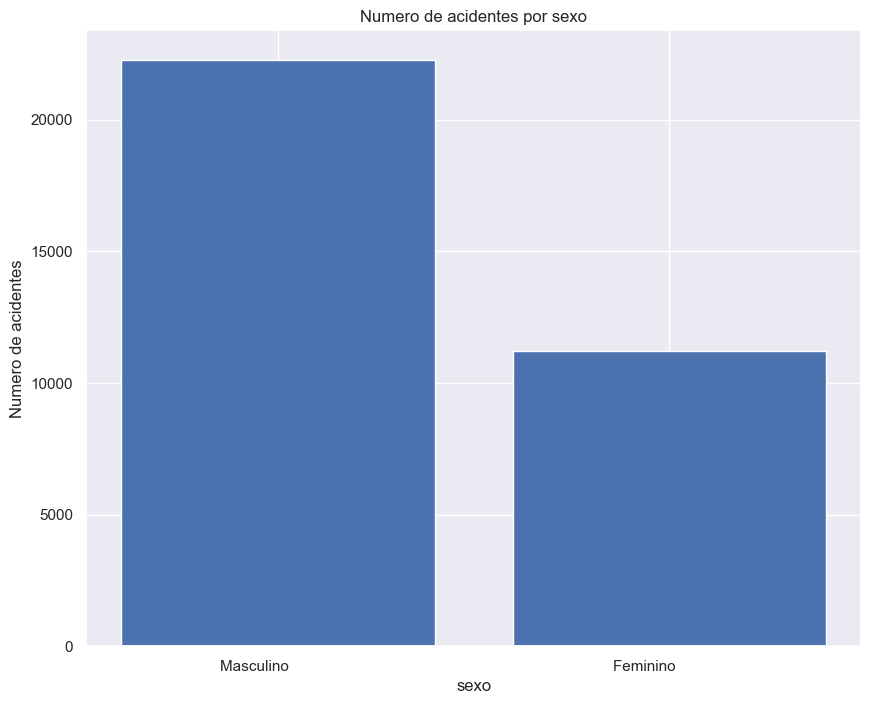

In [104]:
#contar o número de ocorrencias de cada agente causador
contagem_agentes = df_acidentes_filtrado['Sexo'].value_counts()
#plotando um grafico de barras
mpl.figure(figsize=(10, 8))
mpl.bar(contagem_agentes.index, contagem_agentes.values)
mpl.title('Numero de acidentes por sexo')
mpl.xlabel('sexo')
mpl.ylabel('Numero de acidentes')
mpl.show
try:
    mpl.savefig("./imagens/Sexo.png")
    print("Foi salvo uma cópia do arquivo como imagem")
except FileNotFoundError as err:
    print("Não foi possivel salvar arquivo:", err)

Neste gráfico podemos ver que a quantidade de acidentes é muito maior com os pessoas do sexo masculino.

### Números de acidente por Estado

Foi salvo uma cópia do arquivo como imagem


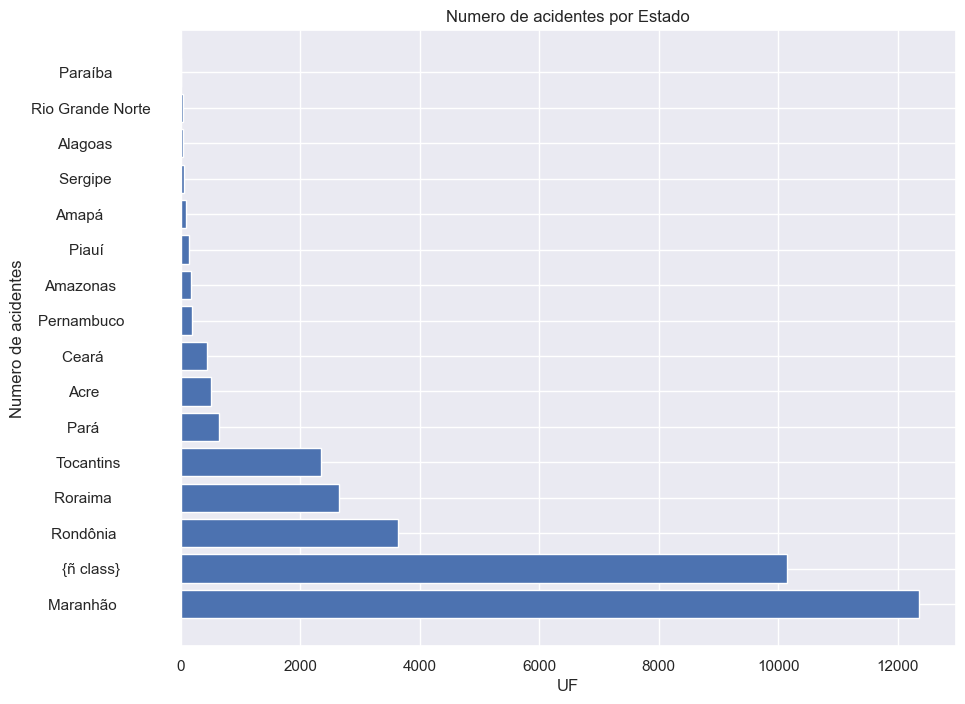

In [105]:
#contar o número de ocorrencias de cada agente causador
contagem_agentes = df_acidentes_filtrado['UF  Munic.  Acidente'].value_counts()
#plotando um grafico de barras
mpl.figure(figsize=(10, 8))
mpl.barh(contagem_agentes.index, contagem_agentes.values)
mpl.title('Numero de acidentes por Estado')
mpl.xlabel('UF')
mpl.ylabel('Numero de acidentes')
mpl.show
try:
    mpl.savefig("./imagens/UF.png")
    print("Foi salvo uma cópia do arquivo como imagem")
except FileNotFoundError as err:
    print("Não foi possivel salvar arquivo:", err)

Aqui vizualisamos que o numero de acidentes tem um grande destaque entre os estados de Tocantins e Maranhão

### Número de acidentes por natureza da lesão

Foi salvo uma cópia do arquivo como imagem


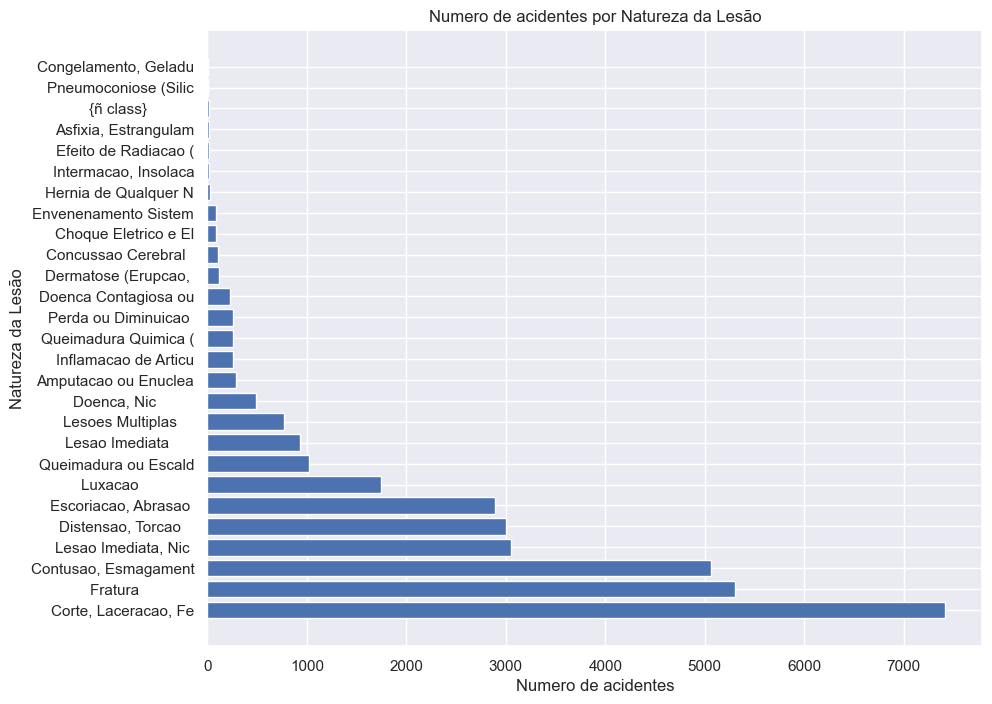

In [106]:
#contar o número de ocorrencias de cada agente causador
contagem_agentes = df_acidentes_filtrado['Natureza da Lesão'].value_counts()
#plotando um grafico de barras
mpl.figure(figsize=(10, 8))
mpl.barh(contagem_agentes.index, contagem_agentes.values)
mpl.title('Numero de acidentes por Natureza da Lesão')
mpl.xlabel('Numero de acidentes')
mpl.ylabel('Natureza da Lesão')
mpl.show
try:
    mpl.savefig("./imagens/Natureza.png")
    print("Foi salvo uma cópia do arquivo como imagem")
except FileNotFoundError as err:
    print("Não foi possivel salvar arquivo:", err)

Aqui vizualisamos que a maioria dos acidentes foi causado por cortes

## Usando Seaborn

Foi salvo uma cópia do arquivo como imagem


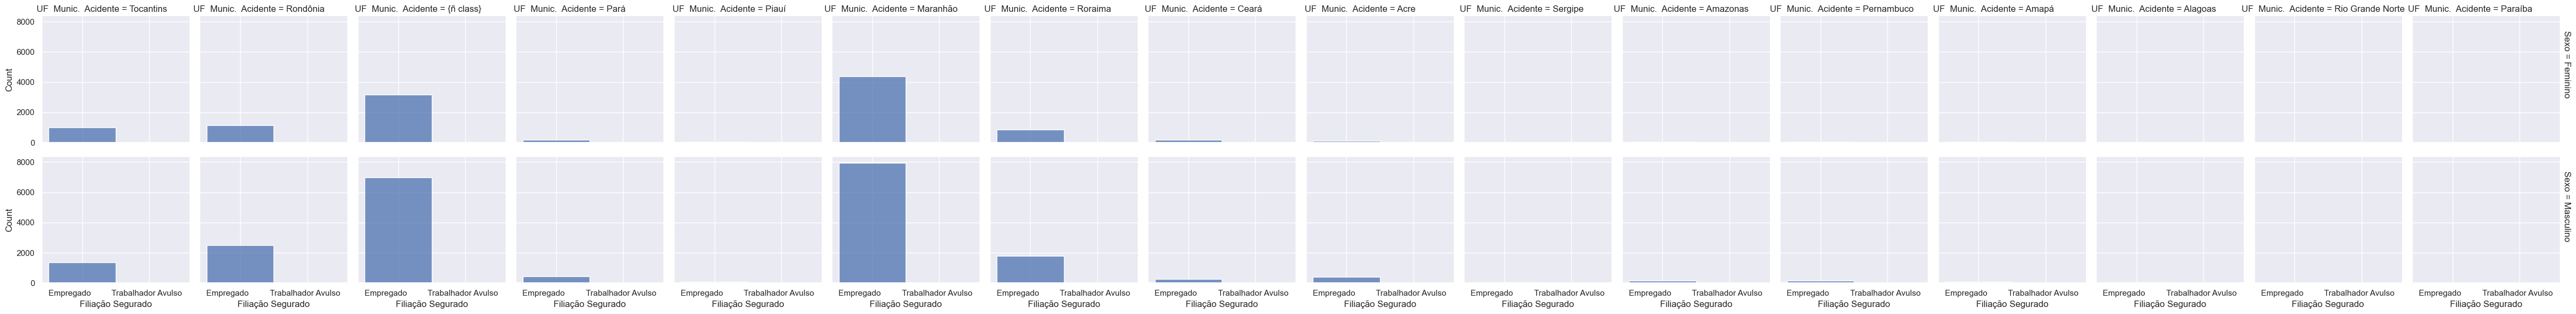

In [107]:
sb.set_theme(style='darkgrid')
sb.displot(df_acidentes_filtrado, x='Filiação Segurado', col='UF  Munic.  Acidente', row='Sexo', binwidth=3, height=3, facet_kws=dict(margin_titles=True))
try:
    mpl.savefig("./imagens/Seaborn.png")
    print("Foi salvo uma cópia do arquivo como imagem")
except FileNotFoundError as err:
    print("Não foi possivel salvar arquivo:", err)

### Tem que dar zoom ksksksk
- Basicamente esta dividido em três parâmetros, UF, Sexo e filiação do segurado. Então as linhas separam o sexo masculino e feminino, as colunas separam por UF, e as colunas de cada gráfico separam a filiação, de empregado e trabalhador avulso

### Fazendo uim grafico de linha
#### Parametros:
- Parte do corpo atingida
- Tipo do acidente

Foi salvo uma cópia do arquivo como imagem


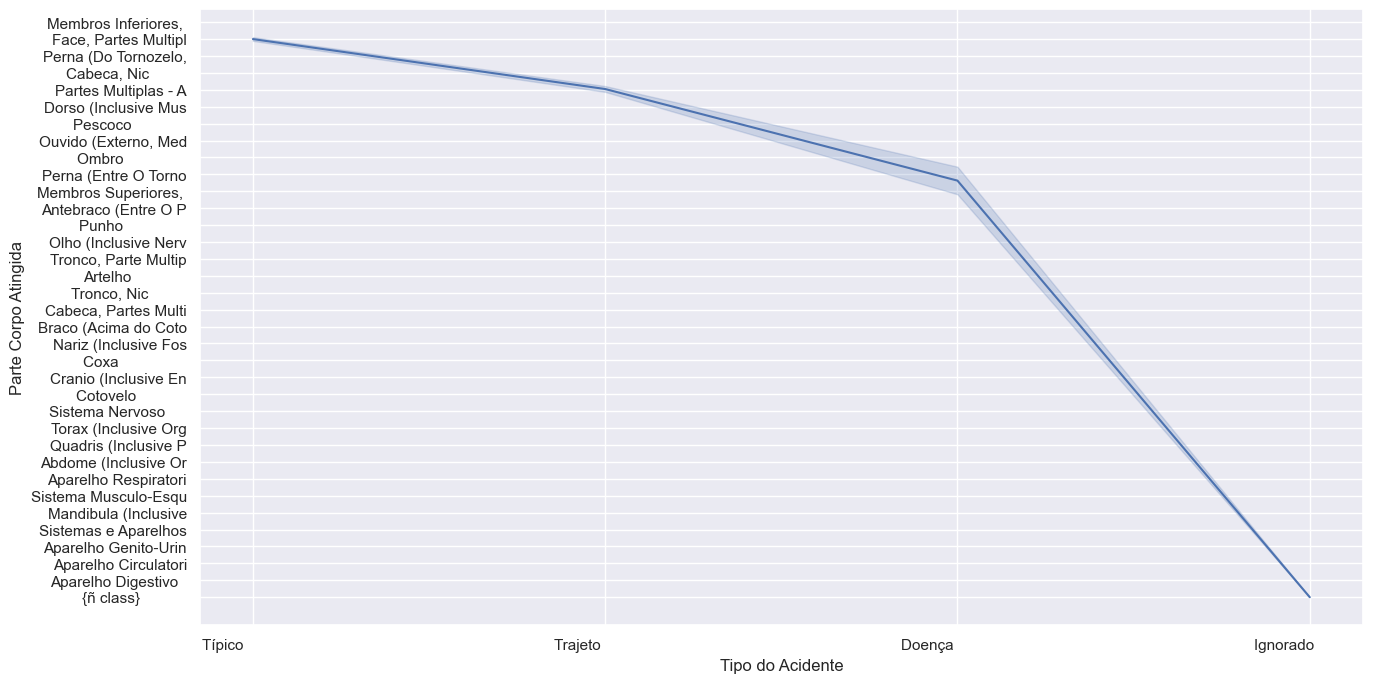

In [108]:
sb.set_theme(style="darkgrid")

mpl.figure(figsize=(15, 8))

sb.lineplot(x="Tipo do Acidente", y="Parte Corpo Atingida", data=df_acidentes_filtrado)

try:
    mpl.savefig("./imagens/Seaborn1.png")
    print("Foi salvo uma cópia do arquivo como imagem")
except FileNotFoundError as err:
    print("Não foi possivel salvar arquivo:", err)

Aqui podemos vizualisar em que regiao do corpo foi o acidente e qual o seu tipo